# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [19]:
import pandas as pd
import scipy.stats as spst

In [20]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [21]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [22]:
# 버스 정류장 데이터 - df_seoul_bus_station
data1 = pd.read_csv('df_seoul_bus_station.csv')
data1.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [23]:
# 유동인구 데이터 - df_seoul_moving
data2 = pd.read_csv('df_seoul_moving.csv')
data2.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합)
0,11010,21.349599,44.235978,9356120,19385709.60
1,11020,21.012462,44.516072,9306020,19715322.61
2,11030,21.364786,36.903883,8514380,14707082.87
3,11040,21.740324,42.685596,8887140,17449273.95
4,11050,22.474283,46.762548,8625540,17947278.99


In [24]:
# 구별 상권 데이터 - df_seoul_business
data3 = pd.read_csv('df_seoul_business.csv')
data3.head()

,자치구,택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수
0,강남구,3592,5034,4830,22972,890,974,4674,13016,2482,12510,3248,14546,768,16640,1426,5056,2852,18040,1654,10016
1,강동구,6590,9960,2202,6776,3056,3132,2376,3980,1800,2858,1092,3320,118,2866,1178,2698,1240,4208,856,2918
2,강북구,3426,5178,1930,5326,2048,2060,1178,1734,1346,1994,716,2190,80,188,1160,2550,440,1480,724,2352
3,강서구,7470,13844,2650,9168,3598,3724,2622,4704,2030,3502,1380,5060,156,1400,1588,3418,1344,4694,1162,4548
4,관악구,2572,4054,2452,7378,3158,3200,2020,4272,1790,3208,1162,4098,62,380,1316,3344,708,2460,844,3256


In [25]:
# 구별 등록 인구 데이터 - df_seoul_people
data4 = pd.read_csv('df_seoul_people.csv')
data4.head()

,자치구,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자
0,종로구,73766,153684,74018,79666,144275,9409,1.96,28064
1,중구,63767,131450,63869,67581,122173,9277,1.92,24742
2,용산구,111207,236518,114571,121947,222169,14349,2.00,39461
3,성동구,134533,291609,141662,149947,285073,6536,2.12,46896
4,광진구,169483,353110,169525,183585,340707,12403,2.01,52604


In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
standard = pd.merge(standard, data1, how='inner', on='자치구')

In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
standard = pd.merge(standard, data2, how='inner', on='도착 시군구 코드')

In [28]:
standard = pd.merge(standard, data3, how='inner', on='자치구')

In [29]:
standard = pd.merge(standard, data4, how='inner', on='자치구')

In [30]:
standard

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합),택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,430,430,3096,11824,1236,1292,1098,1778,522,960,1896,7226,800,1924,1074,2826,220,764,874,3964,73766,153684,74018,79666,144275,9409,1.96,28064
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,460,470,3176,12828,600,666,1152,2304,678,1632,1738,7084,21620,48496,762,1964,114,350,886,4242,63767,131450,63869,67581,122173,9277,1.92,24742
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,8514380,14707082.87,832,1046,1714,5974,910,932,1582,2428,732,1554,1268,4152,108,634,974,2664,208,1146,600,2368,111207,236518,114571,121947,222169,14349,2.00,39461
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,21.740324,42.685596,8887140,17449273.95,2400,5054,1912,5570,2144,2322,1602,2906,978,1702,1094,3718,298,3144,570,1242,516,2988,800,3090,134533,291609,141662,149947,285073,6536,2.12,46896
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,17947278.99,2238,3488,1926,5722,1936,1970,1742,2626,1492,2674,1180,3774,178,1374,1266,3154,826,3292,934,3356,169483,353110,169525,183585,340707,12403,2.01,52604
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,8838130,16288077.28,3092,4186,2472,7132,2862,2912,1684,2416,1222,1782,988,2944,422,1952,998,2164,604,1968,884,3018,169695,352592,172318,180274,337982,14610,1.99,62963
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,23.412789,41.012753,7939300,13907465.59,7268,12524,1982,4958,3608,3754,1476,2208,1580,2216,762,2074,126,568,1070,2000,576,2090,998,3008,187693,393600,193623,199977,389043,4557,2.07,72851
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,22.160283,45.816273,9072420,18757182.35,3670,5286,1946,5644,2624,2670,1692,2350,1478,2490,914,2768,170,908,1024,2060,928,3510,730,2668,197296,442680,212277,230403,433150,9530,2.20,75719
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,23.811274,39.128470,7649610,12570412.30,3426,5178,1930,5326,2048,2060,1178,1734,1346,1994,716,2190,80,188,1160,2550,440,1480,724,2352,144725,300824,145934,154890,297384,3440,2.05,64961
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,24.489976,37.882283,6995880,10821566.75,5986,11566,1344,4018,3142,3148,1030,1588,1200,1694,576,1674,44,86,516,954,702,2324,604,1886,138836,318100,154440,163660,316098,2002,2.28,65122


In [31]:
df = standard.corr()

In [32]:
pd.set_option('display.max_columns', None)
df.head()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합),택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.533514,0.610548,0.235541,0.473119,0.257086,0.255924,0.299283,0.308156,0.217631,0.223808,0.652064,0.581968,0.668534,0.506277,0.254269,0.267956,-0.313424,-0.157478,0.316607,0.318339,0.571740,0.504141,0.314030,0.342618,0.661483,0.687074,0.697314,0.675779,0.680367,-0.023138,0.348330,0.589508
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.223747,0.374723,0.356947,0.355635,0.254818,0.215670,0.157953,0.146445,0.163750,0.171907,0.423486,0.320211,0.485323,0.344539,0.240643,0.209808,-0.485615,-0.418222,0.366972,0.315121,0.347181,0.293698,0.335055,0.291643,0.554665,0.566615,0.550032,0.580536,0.563648,-0.074076,0.315087,0.554425
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.678600,-0.003649,0.388332,0.226437,-0.601440,-0.658988,0.404748,0.413556,-0.576136,-0.566670,0.006077,0.077790,-0.261457,0.105499,0.395274,0.425180,0.276170,0.282179,0.147328,0.262016,-0.152747,-0.058862,0.104076,0.264624,-0.241699,-0.281536,-0.294351,-0.268906,-0.295912,0.376667,-0.295018,-0.334297
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.110113,0.474049,0.581339,0.576553,-0.219573,-0.279193,0.572305,0.574076,-0.187823,-0.190353,0.542368,0.562383,0.357367,0.550024,0.488169,0.530386,-0.151233,-0.024010,0.354584,0.493852,0.349527,0.404332,0.388479,0.522268,0.408783,0.364433,0.359532,0.368034,0.354262,0.129526,-0.015831,0.295889
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.097082,0.463898,0.572769,0.558699,-0.201816,-0.259460,0.546727,0.538578,-0.139249,-0.141275,0.524065,0.532697,0.367160,0.519330,0.457139,0.494266,-0.165922,-0.051134,0.364663,0.485755,0.328345,0.372778,0.373733,0.491315,0.443088,0.388119,0.384499,0.390470,0.376908,0.146077,-0.039725,0.322254


In [ ]:
spst.pearsonr(standard['총이동인구(합)'], standard['역수'])

In [34]:
spst.pearsonr(standard['총이동인구(합)'], standard['정류장수'])

PearsonRResult(statistic=0.3556345657023647, pvalue=0.08103838386719442)

In [ ]:
spst.pearsonr(standard['정류장수'], standard['역수'])

In [ ]:
spst.pearsonr(standard['승차총승객수'], standard['역수'])

In [37]:
seoul_subway = pd.read_csv('seoul_subway.csv', encoding='cp949')
seoul_subway

,연번,자치구,역명(호선),역수
0,1,강남구,"삼성(2), 선릉(2), 역삼(2), 강남(2), 압구정(3), 신사(3), 매봉(...",21
1,2,강동구,"천호(5), 강동(5), 길동(5), 굽은다리(5), 명일(5), 고덕(5), 상일...",14
2,3,강북구,"수유(4), 미아(4), 미아사거리(4)",3
3,4,강서구,"방화(5), 개화산(5), 김포공항(5), 송정(5), 마곡(5), 발산(5), 우...",9
4,5,관악구,"낙성대(2), 서울대입구(2), 봉천(2), 신림(2)",4
5,6,광진구,"건대입구(2), 구의(2), 강변(2), 군자(5), 아차산(5), 광나루(5), ...",11
6,7,구로구,"구로디지털단지(2), 대림(2), 신도림(2), 도림천(2), 남구로(7), 천왕(...",7
7,8,금천구,가산디지털단지(7),1
8,9,노원구,"당고개(4), 상계(4), 노원(4), 석계(6), 태릉입구(6), 화랑대(6), ...",13
9,10,도봉구,"창동(4), 쌍문(4), 도봉산(7)",3


In [38]:
seoul_subway.drop([25, 26, 27, 28, 29], axis=0, inplace=True)
seoul_subway.drop(['연번', '역명(호선)'], axis=1, inplace=True)

In [39]:
seoul_subway

,자치구,역수
0,강남구,21
1,강동구,14
2,강북구,3
3,강서구,9
4,관악구,4
5,광진구,11
6,구로구,7
7,금천구,1
8,노원구,13
9,도봉구,3


In [40]:
standard = pd.merge(standard, seoul_subway, how='inner', on='자치구')

In [41]:
standard.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합),택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자,역수
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,430,430,3096,11824,1236,1292,1098,1778,522,960,1896,7226,800,1924,1074,2826,220,764,874,3964,73766,153684,74018,79666,144275,9409,1.96,28064,15
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,460,470,3176,12828,600,666,1152,2304,678,1632,1738,7084,21620,48496,762,1964,114,350,886,4242,63767,131450,63869,67581,122173,9277,1.92,24742,23
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,8514380,14707082.87,832,1046,1714,5974,910,932,1582,2428,732,1554,1268,4152,108,634,974,2664,208,1146,600,2368,111207,236518,114571,121947,222169,14349,2.00,39461,10
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,21.740324,42.685596,8887140,17449273.95,2400,5054,1912,5570,2144,2322,1602,2906,978,1702,1094,3718,298,3144,570,1242,516,2988,800,3090,134533,291609,141662,149947,285073,6536,2.12,46896,14
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,17947278.99,2238,3488,1926,5722,1936,1970,1742,2626,1492,2674,1180,3774,178,1374,1266,3154,826,3292,934,3356,169483,353110,169525,183585,340707,12403,2.01,52604,11


In [42]:
df = standard.corr()

In [43]:
pd.set_option('display.max_columns', None)
df.head()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합),택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자,역수
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.533514,0.610548,0.235541,0.473119,0.257086,0.255924,0.299283,0.308156,0.217631,0.223808,0.652064,0.581968,0.668534,0.506277,0.254269,0.267956,-0.313424,-0.157478,0.316607,0.318339,0.571740,0.504141,0.314030,0.342618,0.661483,0.687074,0.697314,0.675779,0.680367,-0.023138,0.348330,0.589508,0.104733
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.223747,0.374723,0.356947,0.355635,0.254818,0.215670,0.157953,0.146445,0.163750,0.171907,0.423486,0.320211,0.485323,0.344539,0.240643,0.209808,-0.485615,-0.418222,0.366972,0.315121,0.347181,0.293698,0.335055,0.291643,0.554665,0.566615,0.550032,0.580536,0.563648,-0.074076,0.315087,0.554425,-0.005730
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.678600,-0.003649,0.388332,0.226437,-0.601440,-0.658988,0.404748,0.413556,-0.576136,-0.566670,0.006077,0.077790,-0.261457,0.105499,0.395274,0.425180,0.276170,0.282179,0.147328,0.262016,-0.152747,-0.058862,0.104076,0.264624,-0.241699,-0.281536,-0.294351,-0.268906,-0.295912,0.376667,-0.295018,-0.334297,0.152124
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.110113,0.474049,0.581339,0.576553,-0.219573,-0.279193,0.572305,0.574076,-0.187823,-0.190353,0.542368,0.562383,0.357367,0.550024,0.488169,0.530386,-0.151233,-0.024010,0.354584,0.493852,0.349527,0.404332,0.388479,0.522268,0.408783,0.364433,0.359532,0.368034,0.354262,0.129526,-0.015831,0.295889,0.128403
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.097082,0.463898,0.572769,0.558699,-0.201816,-0.259460,0.546727,0.538578,-0.139249,-0.141275,0.524065,0.532697,0.367160,0.519330,0.457139,0.494266,-0.165922,-0.051134,0.364663,0.485755,0.328345,0.372778,0.373733,0.491315,0.443088,0.388119,0.384499,0.390470,0.376908,0.146077,-0.039725,0.322254,0.110545


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1

In [ ]:
정류장수와 승/하차 총 승객수는 연관이 있을 것이다.

* 가설 2

In [ ]:
정류장수와 인구 수는 연관이 있을 것이다.

* 가설 3

In [ ]:
정류장수와 세대 수는 연관이 있을 것이다.

In [ ]:
노선수와 평균 이동 시간은 연관이 있을 것이다. 

In [ ]:
노선 수와 택시 운송업 사업체/종사자 수는 연관이 있을 것이다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [44]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

### 1)


In [45]:
import matplotlib
matplotlib.get_cachedir()

'C:\\Users\\User\\.matplotlib'

In [46]:
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

# 확인 이후
plt.rc('font', family='NanumGothicCoding')

['cmb10', 'DejaVu Serif', 'DejaVu Serif Display', 'STIXGeneral', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXGeneral', 'DejaVu Sans', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'cmsy10', 'STIXSizeFourSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'cmmi10', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeFourSym', 'STIXNonUnicode', 'DejaVu Sans Mono', 'cmex10', 'cmtt10', 'cmr10', 'DejaVu Sans', 'STIXGeneral', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXNonUnicode', 'STIXSizeOneSym', 'cmss10', 'STIXNonUnicode', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans Display', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'STIXSizeFiveSym', 'Tahoma', 'Georgia', 'Eras Medium ITC', 'Comic Sans MS', 'Garamond', 'Calisto MT', 'Tw Cen MT Condensed', 'Lucida Fax', 'HYPost-Medium', 'Sitka Small', 'Ink Free', 'Calisto MT', 'Chiller', 'Microsoft YaHei', 'Batang', 'Franklin Gothic Book', 'Lucida Sans Typewriter', 'MS Reference Sans Serif', 'Book Antiqua', 'Bodoni MT', 'Gill Sans MT Ext Condensed Bold', 'Tw Cen MT', 'Perpet

c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\li

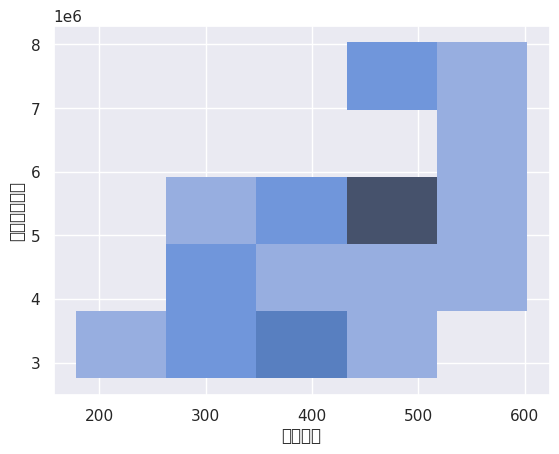

In [64]:
sns.histplot(x='정류장수', y='승차총승객수', data=standard, bins=5, kde=True)
plt.show()

In [63]:
d = pd.read_csv('seoul_area.csv', encoding='cp949')
d.head()

,FID,Shape,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,Area
0,0,Polygon,20220630,11010,종로구,24
1,1,Polygon,20220630,11020,중구,10
2,2,Polygon,20220630,11030,용산구,22
3,3,Polygon,20220630,11040,성동구,17
4,4,Polygon,20220630,11050,광진구,17


In [67]:
d.drop('FID', axis=1, inplace=True)

In [69]:
d.drop(['Shape', 'BASE_DATE', 'SIGUNGU_CD'], axis=1, inplace=True)

In [70]:
d.head()

,SIGUNGU_NM,Area
0,종로구,24
1,중구,10
2,용산구,22
3,성동구,17
4,광진구,17


In [71]:
d.rename(columns={'SIGUNGU_NM':'자치구'}, inplace=True)

In [72]:
d.head()

,자치구,Area
0,종로구,24
1,중구,10
2,용산구,22
3,성동구,17
4,광진구,17


In [73]:
standard = pd.merge(standard, d, how='inner', on='자치구')

In [74]:
standard.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합),택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자,역수,비율1,비율2,비율3,비율4,비율5,비율6,비율7,Area
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,430,430,3096,11824,1236,1292,1098,1778,522,960,1896,7226,800,1924,1074,2826,220,764,874,3964,73766,153684,74018,79666,144275,9409,1.96,28064,15,0.638150,22.708935,47.311770,2465.116279,49649.645366,2465.116279,49649.645366,24
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,460,470,3176,12828,600,666,1152,2304,678,1632,1738,7084,21620,48496,762,1964,114,350,886,4242,63767,131450,63869,67581,122173,9277,1.92,24742,23,0.471314,13.541270,27.914125,2239.130435,49018.531015,2239.130435,49018.531015,10
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,8514380,14707082.87,832,1046,1714,5974,910,932,1582,2428,732,1554,1268,4152,108,634,974,2664,208,1146,600,2368,111207,236518,114571,121947,222169,14349,2.00,39461,10,0.770887,13.656466,29.044934,805.288462,31360.014470,805.288462,31360.014470,22
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,21.740324,42.685596,8887140,17449273.95,2400,5054,1912,5570,2144,2322,1602,2906,978,1702,1094,3718,298,3144,570,1242,516,2988,800,3090,134533,291609,141662,149947,285073,6536,2.12,46896,14,1.549543,14.917235,32.334074,241.666667,26678.535502,241.666667,26678.535502,17
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,17947278.99,2238,3488,1926,5722,1936,1970,1742,2626,1492,2674,1180,3774,178,1374,1266,3154,826,3292,934,3356,169483,353110,169525,183585,340707,12403,2.01,52604,11,0.978378,7.618023,15.871798,183.199285,18243.073477,183.199285,18243.073477,17


## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [60]:
import scipy.stats as spst

result = spst.pearsonr(standard['정류장수'],standard['승차총승객수'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.5666813370974585, p-value : 0.003141977397117322



- 강한 양의 상관관계 
- 귀무가설 기각 
- 정류장수와 승차 총승객수는 상관관계가 있다

findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.
c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\lib\site-packages\IPython\core

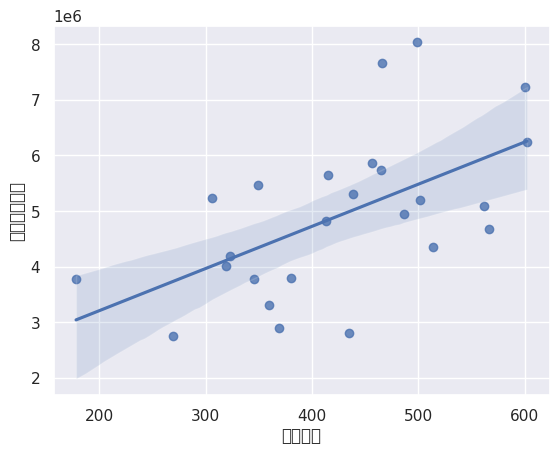

In [48]:
sns.regplot(x='정류장수', y='승차총승객수', data = standard)
plt.show()

In [49]:
result = spst.pearsonr(standard['정류장수'],standard['인구'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.5666148323603177, p-value : 0.003146292242946791


- 강한 양의 상관관계
- 귀무가설 기각
- 정류장수와 인구 수는 상관관계가 있다

In [50]:
result = spst.pearsonr(standard['정류장수'],standard['세대'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.5546647988285036, p-value : 0.00400799851320789


- 강한 양의 상관관계
- 귀무가설 기각
- 정류장수와 세대 수는 상관관계가 있다

In [51]:
result = spst.pearsonr(standard['노선수'],standard['택시운송업-사업체수'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.6014400720696349, p-value : 0.0014720884625314345


- 강한 음의 상관관계
- 귀무가설 기각
- 노선 수와 택시운송업 사업체 수는 상관관계가 있다.

In [52]:
result = spst.pearsonr(standard['노선수'],standard['평균 이동 시간(분)'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.6786000547455109, p-value : 0.00019237294667152178


- 강한 음의 상관관계
- 귀무가설 기각
- 노선 수와 평균 이동 시간은 상관관계가 있다.

In [53]:
standard['비율1'] = standard['정류장수'] / standard['승차총승객수'] * 10000
standard.sort_values(by=['비율1']).head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합),택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자,역수,비율1
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,460,470,3176,12828,600,666,1152,2304,678,1632,1738,7084,21620,48496,762,1964,114,350,886,4242,63767,131450,63869,67581,122173,9277,1.92,24742,23,0.471314
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,8838130,16288077.28,3092,4186,2472,7132,2862,2912,1684,2416,1222,1782,988,2944,422,1952,998,2164,604,1968,884,3018,169695,352592,172318,180274,337982,14610,1.99,62963,6,0.583907
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.377928,49.904036,8772170,18725641.04,2572,4054,2452,7378,3158,3200,2020,4272,1790,3208,1162,4098,62,380,1316,3344,708,2460,844,3256,279353,500336,250450,249886,486375,13961,1.74,80686,4,0.608687
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,11437560,44684651.43,3592,5034,4830,22972,890,974,4674,13016,2482,12510,3248,14546,768,16640,1426,5056,2852,18040,1654,10016,234612,537338,257096,280242,532577,4761,2.27,79575,21,0.621382
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,430,430,3096,11824,1236,1292,1098,1778,522,960,1896,7226,800,1924,1074,2826,220,764,874,3964,73766,153684,74018,79666,144275,9409,1.96,28064,15,0.638150


In [54]:
standard['비율2'] = standard['정류장수'] / standard['인구'] * 10000
standard.sort_values(by=['비율2']).head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합),택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자,역수,비율1,비율2
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,25.429707,83.493581,10610520,34837613.05,5276,9700,3150,11520,3820,3862,3354,6380,2274,4656,1950,6744,294,5660,1256,2938,1752,8320,1278,5562,285106,668261,321963,346298,662607,5654,2.32,99854,28,0.735588,6.210148
14,11150,양천구,319,56,4009172,3851173,97.627526,93.780086,22.793734,46.544142,7379950,15069643.56,5470,9884,1662,5600,2572,2586,1844,2728,1676,2856,804,2750,50,104,830,1702,2568,11608,562,2222,181765,449378,219882,229496,446182,3196,2.45,69953,5,0.795676,7.098701
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,17947278.99,2238,3488,1926,5722,1936,1970,1742,2626,1492,2674,1180,3774,178,1374,1266,3154,826,3292,934,3356,169483,353110,169525,183585,340707,12403,2.01,52604,11,0.978378,7.618023
24,11250,강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,8430800,21101460.33,6590,9960,2202,6776,3056,3132,2376,3980,1800,2858,1092,3320,118,2866,1178,2698,1240,4208,856,2918,201926,465097,227891,237206,461300,3797,2.28,75477,14,1.276793,7.933829
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,8838130,16288077.28,3092,4186,2472,7132,2862,2912,1684,2416,1222,1782,988,2944,422,1952,998,2164,604,1968,884,3018,169695,352592,172318,180274,337982,14610,1.99,62963,6,0.583907,8.678586


In [55]:
standard['비율3'] = standard['정류장수'] / standard['세대'] * 10000
standard.sort_values(by=['비율3']).head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합),택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자,역수,비율1,비율2,비율3
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,25.429707,83.493581,10610520,34837613.05,5276,9700,3150,11520,3820,3862,3354,6380,2274,4656,1950,6744,294,5660,1256,2938,1752,8320,1278,5562,285106,668261,321963,346298,662607,5654,2.32,99854,28,0.735588,6.210148,14.555990
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,17947278.99,2238,3488,1926,5722,1936,1970,1742,2626,1492,2674,1180,3774,178,1374,1266,3154,826,3292,934,3356,169483,353110,169525,183585,340707,12403,2.01,52604,11,0.978378,7.618023,15.871798
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.377928,49.904036,8772170,18725641.04,2572,4054,2452,7378,3158,3200,2020,4272,1790,3208,1162,4098,62,380,1316,3344,708,2460,844,3256,279353,500336,250450,249886,486375,13961,1.74,80686,4,0.608687,9.313741,16.681403
14,11150,양천구,319,56,4009172,3851173,97.627526,93.780086,22.793734,46.544142,7379950,15069643.56,5470,9884,1662,5600,2572,2586,1844,2728,1676,2856,804,2750,50,104,830,1702,2568,11608,562,2222,181765,449378,219882,229496,446182,3196,2.45,69953,5,0.795676,7.098701,17.550133
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,8838130,16288077.28,3092,4186,2472,7132,2862,2912,1684,2416,1222,1782,988,2944,422,1952,998,2164,604,1968,884,3018,169695,352592,172318,180274,337982,14610,1.99,62963,6,0.583907,8.678586,18.032352


In [56]:
standard['비율4'] = standard['노선수'] / standard['택시운송업-사업체수'] * 10000
standard.sort_values(by=['비율4']).head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합),택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자,역수,비율1,비율2,비율3,비율4
24,11250,강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,8430800,21101460.33,6590,9960,2202,6776,3056,3132,2376,3980,1800,2858,1092,3320,118,2866,1178,2698,1240,4208,856,2918,201926,465097,227891,237206,461300,3797,2.28,75477,14,1.276793,7.933829,18.274021,31.866464
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.447282,9388010,21839762.06,7470,13844,2650,9168,3598,3724,2622,4704,2030,3502,1380,5060,156,1400,1588,3418,1344,4694,1162,4548,272572,578426,277797,300629,573046,5380,2.10,93924,9,1.209122,9.785176,20.765156,65.595716
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,23.412789,41.012753,7939300,13907465.59,7268,12524,1982,4958,3608,3754,1476,2208,1580,2216,762,2074,126,568,1070,2000,576,2090,998,3008,187693,393600,193623,199977,389043,4557,2.07,72851,8,1.001967,9.654472,20.245827,66.042928
10,11110,노원구,514,57,4353295,4292724,88.476211,87.245168,24.029515,55.184590,8975240,20611941.03,8228,12148,1732,5300,3460,3472,1428,2106,1564,2706,1070,3496,60,246,710,1688,1470,6562,856,3114,219065,514445,247417,267028,510486,3959,2.33,89426,13,1.180715,9.991350,23.463356,69.275644
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,24.489976,37.882283,6995880,10821566.75,5986,11566,1344,4018,3142,3148,1030,1588,1200,1694,576,1674,44,86,516,954,702,2324,604,1886,138836,318100,154440,163660,316098,2002,2.28,65122,3,1.086461,11.285759,25.857847,76.845974


In [57]:
standard['비율5'] = standard['노선수'] / standard['평균 이동 시간(분)'] * 10000
standard.sort_values(by=['비율5']).head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합),택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자,역수,비율1,비율2,비율3,비율4,비율5
24,11250,강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,8430800,21101460.33,6590,9960,2202,6776,3056,3132,2376,3980,1800,2858,1092,3320,118,2866,1178,2698,1240,4208,856,2918,201926,465097,227891,237206,461300,3797,2.28,75477,14,1.276793,7.933829,18.274021,31.866464,8180.728994
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,17947278.99,2238,3488,1926,5722,1936,1970,1742,2626,1492,2674,1180,3774,178,1374,1266,3154,826,3292,934,3356,169483,353110,169525,183585,340707,12403,2.01,52604,11,0.978378,7.618023,15.871798,183.199285,18243.073477
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,24.489976,37.882283,6995880,10821566.75,5986,11566,1344,4018,3142,3148,1030,1588,1200,1694,576,1674,44,86,516,954,702,2324,604,1886,138836,318100,154440,163660,316098,2002,2.28,65122,3,1.086461,11.285759,25.857847,76.845974,18783.195252
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.447282,9388010,21839762.06,7470,13844,2650,9168,3598,3724,2622,4704,2030,3502,1380,5060,156,1400,1588,3418,1344,4694,1162,4548,272572,578426,277797,300629,573046,5380,2.10,93924,9,1.209122,9.785176,20.765156,65.595716,19503.211011
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,23.412789,41.012753,7939300,13907465.59,7268,12524,1982,4958,3608,3754,1476,2208,1580,2216,762,2074,126,568,1070,2000,576,2090,998,3008,187693,393600,193623,199977,389043,4557,2.07,72851,8,1.001967,9.654472,20.245827,66.042928,20501.616011


In [58]:
standard['비율6'] = standard['노선수'] / standard['택시운송업-사업체수'] * 10000
standard.sort_values(by=['비율6']).tail()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합),택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자,역수,비율1,비율2,비율3,비율4,비율5,비율6
19,11200,동작구,438,94,5314274,5112276,124.295965,119.571419,21.867593,40.991815,8408680,15762459.46,2066,2230,1530,4644,1660,1688,1766,2966,1302,2210,972,3256,40,398,878,1910,814,2926,662,2354,186419,394649,190377,204272,386017,8632,2.07,67470,12,0.824195,11.098470,23.495459,454.985479,42985.983531,454.985479
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,8514380,14707082.87,832,1046,1714,5974,910,932,1582,2428,732,1554,1268,4152,108,634,974,2664,208,1146,600,2368,111207,236518,114571,121947,222169,14349,2.00,39461,10,0.770887,13.656466,29.044934,805.288462,31360.014470,805.288462
21,11220,서초구,600,93,7221330,6977950,126.687777,122.418028,22.831643,64.138624,10291660,28911318.58,834,1806,3128,13424,772,822,2914,5516,1352,3664,2024,7794,314,3126,892,2510,1624,7624,890,4676,169895,413677,197665,216012,409823,3854,2.41,61404,12,0.830872,14.504070,35.315930,1115.107914,40732.942013,1115.107914
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,460,470,3176,12828,600,666,1152,2304,678,1632,1738,7084,21620,48496,762,1964,114,350,886,4242,63767,131450,63869,67581,122173,9277,1.92,24742,23,0.471314,13.541270,27.914125,2239.130435,49018.531015,2239.130435
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,430,430,3096,11824,1236,1292,1098,1778,522,960,1896,7226,800,1924,1074,2826,220,764,874,3964,73766,153684,74018,79666,144275,9409,1.96,28064,15,0.638150,22.708935,47.311770,2465.116279,49649.645366,2465.116279


### 1)

In [59]:
standard['비율7'] = standard['노선수'] / standard['평균 이동 시간(분)'] * 10000
standard.sort_values(by=['비율7']).tail()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총이동인구(합),택시운송업-사업체수,택시운송업-종사자수,한식 일반 음식점업-사업체수,한식 일반 음식점업-종사자수,용달 화물자동차 운송업-사업체수,용달 화물자동차 운송업-종사자수,부동산 중개 및 대리업-사업체수,부동산 중개 및 대리업-종사자수,두발미용업-사업체수,두발미용업-종사자수,커피전문점-사업체수,커피전문점-종사자수,남녀용 겉옷 및 셔츠 도매업-사업체수,남녀용 겉옷 및 셔츠 도매업-종사자수,기타주점업-사업체수,기타주점업-종사자수,일반 교과 학원-사업체수,일반 교과 학원-종사자수,한식 육류요리 전문점-사업체수,한식 육류요리 전문점-종사자수,세대,인구,남자,여자,한국인,등록외국인,세대당인구,65세이상고령자,역수,비율1,비율2,비율3,비율4,비율5,비율6,비율7
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,22.160283,45.816273,9072420,18757182.35,3670,5286,1946,5644,2624,2670,1692,2350,1478,2490,914,2768,170,908,1024,2060,928,3510,730,2668,197296,442680,212277,230403,433150,9530,2.20,75719,9,0.965297,13.598988,30.512529,269.754768,44674.519037,269.754768,44674.519037
18,11190,영등포구,465,101,5739875,5783211,120.337855,121.246404,21.615227,56.414634,9581360,25006858.60,2698,4794,3476,12952,2562,2858,1972,3132,1346,2522,1676,6590,152,2440,1272,2978,576,2164,988,4302,188193,400241,198080,202161,376740,23501,2.00,63547,11,0.810122,11.618000,24.708677,374.351371,46726.319646,374.351371,46726.319646
12,11130,서대문구,456,107,5863499,5796960,109.914502,108.667192,22.026816,42.416672,8465390,16301660.39,3494,5354,1726,5388,1604,1616,1334,1912,1196,2370,740,2646,44,136,994,2254,722,2536,622,2176,145044,317075,149805,167270,305866,11209,2.11,55012,5,0.777693,14.381455,31.438736,306.239267,48577.152382,306.239267,48577.152382
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,460,470,3176,12828,600,666,1152,2304,678,1632,1738,7084,21620,48496,762,1964,114,350,886,4242,63767,131450,63869,67581,122173,9277,1.92,24742,23,0.471314,13.541270,27.914125,2239.130435,49018.531015,2239.130435,49018.531015
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,430,430,3096,11824,1236,1292,1098,1778,522,960,1896,7226,800,1924,1074,2826,220,764,874,3964,73766,153684,74018,79666,144275,9409,1.96,28064,15,0.638150,22.708935,47.311770,2465.116279,49649.645366,2465.116279,49649.645366


### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(seoul_bus_station.corr(), annot = True)
plt.show()

## 4.관계 정리

### 1) 강한 관계의 변수

- 정류장수 : 승/하차 총 승객수
- 정류장수 : 인구
- 정류장수 : 세대
- 노선수 : 택시운송업 사업체수
- 노선수 : 평균 이동 시간

### 2) 약한 관계의 변수

- 정류장수 : 승/하차 평균 승객수
- 정류장수 : 이동인구
- 정류장 : 일반 교과 학원

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?


- 동대문구 -> 승하차 총 승객 수, 인구, 세대 수 대비 정류장 수 적음. 
- 관악구 -> 승하차 총 승객 수, 인구 수 대비 정류장 수 적음.
- 송파구 -> 인구, 세대 수 대비 정류장 수 적음.
- 광진구 -> 평균 이동 시간 대비 노선 수 적음. 인구, 세대 수 대비 정류장 수 적음.
- 강동구 -> 택시 운송업 사업체 수, 평균 이동 시간 대비 노선 수가 적음. 